<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/fashion_mnist_keras(sequential).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*  **Fashion MNIST**
*  **Sequential API**
*  **Normalised By Dividing**


In [1]:
#impporting all the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)
print(keras.__version__)


2.2.0
2.3.0-tf


In [2]:
# fetching the FASHION MNIST dataset from keras

fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# normalizing the dataset(by dividing it with 255.0) and further creating a validation set by taking a slice(5000) from train set

valid_images, train_images = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
valid_labels, train_labels = y_train_full[:5000], y_train_full[5000:]
test_images = X_test/255.0
test_labels = y_test

In [4]:
# official class_names array --> https://github.com/zalandoresearch/fashion-mnist 

class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

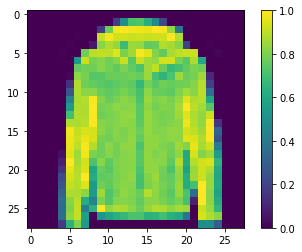

In [5]:
# viewing the images(tracing pixel density)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

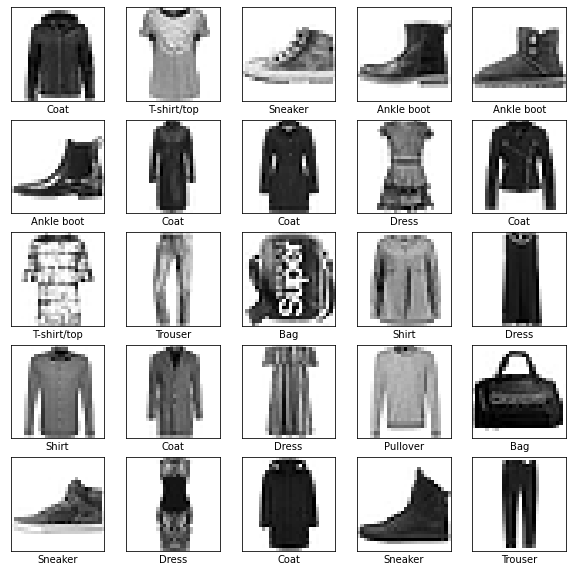

In [6]:
# rechecking the fetched dataset on grayscale

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [7]:
#viewing the dimensions of every segment of the dataset

print(train_images.shape,"\n", train_labels.shape,"\n", test_images.shape,"\n", test_labels.shape,"\n", valid_images.shape,"\n", valid_labels.shape,"\n")


(55000, 28, 28) 
 (55000,) 
 (10000, 28, 28) 
 (10000,) 
 (5000, 28, 28) 
 (5000,) 



In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
#summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               75150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 469,160
Trainable params: 469,160
Non-trainable params: 0
_________________________________________________________________


In [10]:
#viewing the weights and biases

model.layers
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

print(weights, "\n\n", biases, "\n\n\n")
print(weights.shape," ", biases.shape)

[[ 0.00929113  0.0100672  -0.00250932 ... -0.03681337  0.00982886
  -0.03429868]
 [ 0.04638533 -0.04002076  0.03609062 ...  0.05945166  0.05243925
  -0.03057955]
 [-0.02911531 -0.03193384 -0.0016319  ...  0.03203434 -0.00752286
  -0.05854952]
 ...
 [ 0.02464307 -0.02157643  0.03864177 ...  0.03774941  0.0004748
  -0.04943184]
 [ 0.01863682  0.00091466  0.05662918 ...  0.03956983  0.02520493
   0.02673395]
 [ 0.06643068 -0.01591142  0.06067174 ... -0.03850342 -0.02823954
  -0.04314466]] 

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [11]:
#compiling the model

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
#training the model (parent step) 

EPOCHS = int(input()) #<-- enter number of epochs

history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_data=(valid_images, valid_labels))

200
Epoch 1/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6960 - accuracy: 0.7709 - val_loss: 0.5520 - val_accuracy: 0.8090
Epoch 2/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4830 - accuracy: 0.8309 - val_loss: 0.5008 - val_accuracy: 0.8276
Epoch 3/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4376 - accuracy: 0.8479 - val_loss: 0.4127 - val_accuracy: 0.8566
Epoch 4/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4105 - accuracy: 0.8565 - val_loss: 0.4121 - val_accuracy: 0.8544
Epoch 5/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3910 - accuracy: 0.8616 - val_loss: 0.3774 - val_accuracy: 0.8706
Epoch 6/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3737 - accuracy: 0.8686 - val_loss: 0.3737 - val_accuracy: 0.8662
Epoch 7/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3608 - accuracy: 0.8721 - val_loss: 0.3673 - va

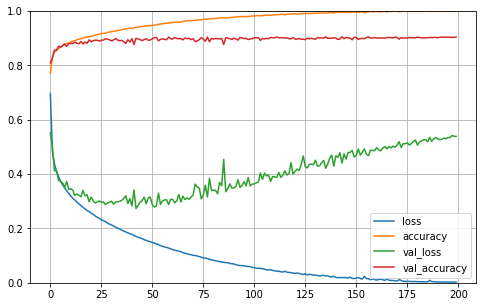

In [13]:
#viewing the losses and accuracies saved in 'history'

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
#testing the model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5989 - accuracy: 0.8939

Test accuracy: 0.8938999772071838


In [15]:
#saving all the predictions of every test_images in 'predictions' array

predictions = model.predict(test_images)

In [16]:
#viewing an instance of the 'predictions' array

predictions[0]

array([6.2869098e-12, 1.4310338e-13, 2.8672109e-09, 3.4807933e-12,
       2.1178646e-14, 2.1204245e-07, 6.5397387e-18, 2.5672435e-07,
       5.7796840e-10, 9.9999952e-01], dtype=float32)

In [17]:
#taking the max score of a particular prediction

np.argmax(predictions[0])

9

In [18]:
#actual label from the dataset[ it macthes with the predicted label in the above cell, hence its a successfull prediction]

test_labels[0]

9

In [19]:
#function to view the image and with labels(predicted class, score%, actual class)

def plotImg(i, preds_arr, true_label, img):
    true_label, img = true_label[i], img[i]

    plt.yticks([])
    plt.xticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    pred_label = np.argmax(preds_arr)

    if pred_label == true_label:
        COLOR = 'green'
    else:
        COLOR = 'red'

    plt.xlabel("{} {:0.2f}% ({})".format(class_names[pred_label], 100*np.max(preds_arr), class_names[true_label]), color=COLOR)


In [20]:
#function to construct bar graphs of the scores of each class

def plotGraph(i, preds_arr, true_label):
    true_label = true_label[i]

    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0, 1])
    PLOT = plt.bar(range(10), preds_arr, color="#777777")

# for a successfull prediction color is 'green' else 'red'
    PLOT[np.argmax(preds_arr)].set_color('red')
    PLOT[true_label].set_color('green')


In [21]:
#packing two funtions in one callable funtion

def plotter(i, preds_arr, test_labels, test_images):
    preds = preds_arr[i]
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plotImg(i, preds, test_labels, test_images)
    plt.subplot(1,2,2)
    plotGraph(i, preds, test_labels)

In [23]:
i = int(input()) # <-- get your input here


10


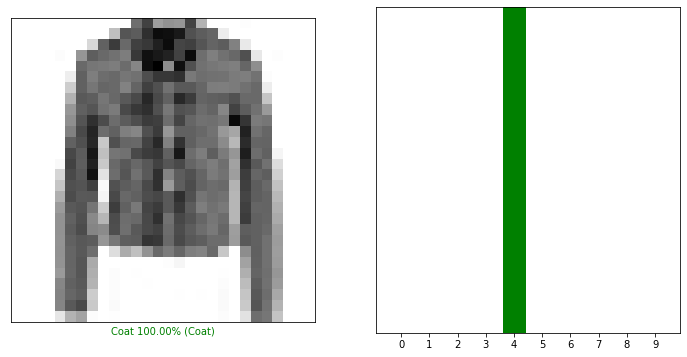

In [24]:
# using the function

plotter(i, predictions, test_labels, test_images)

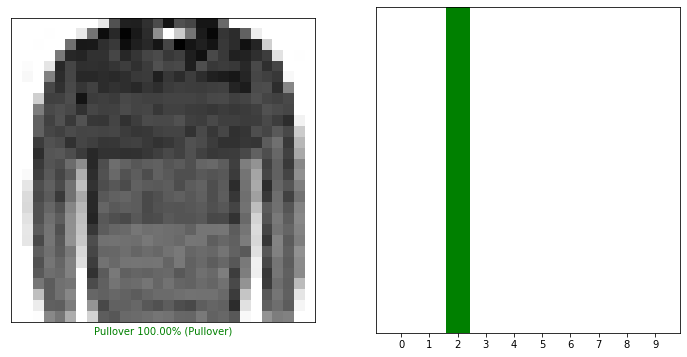

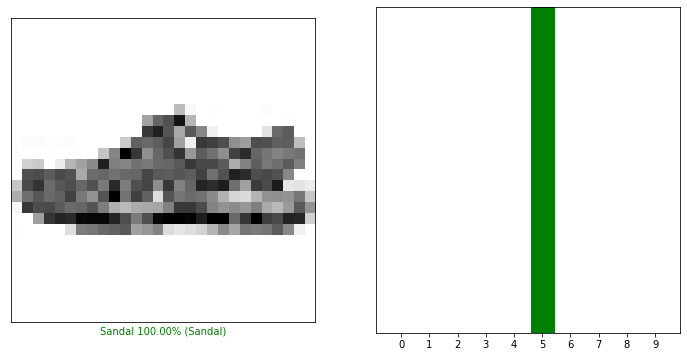

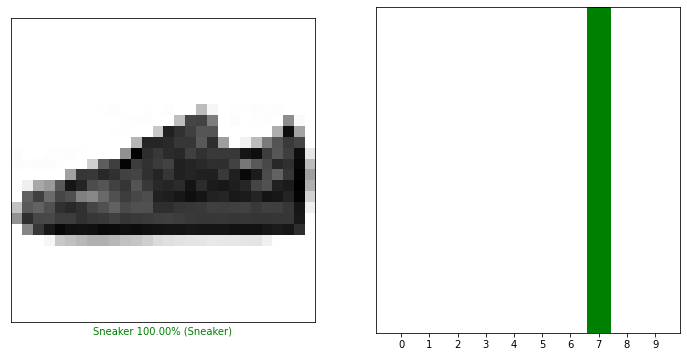

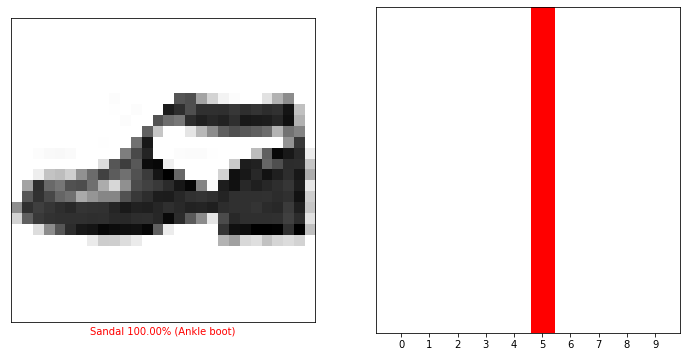

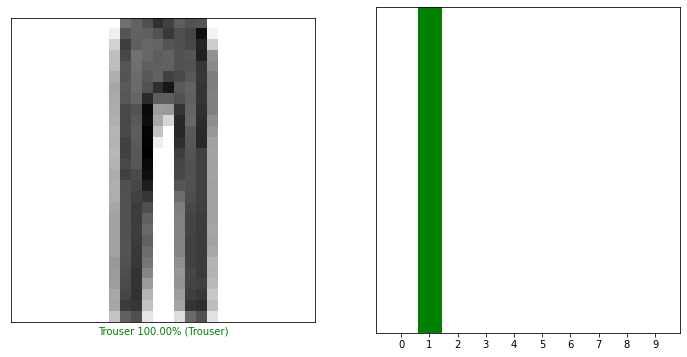

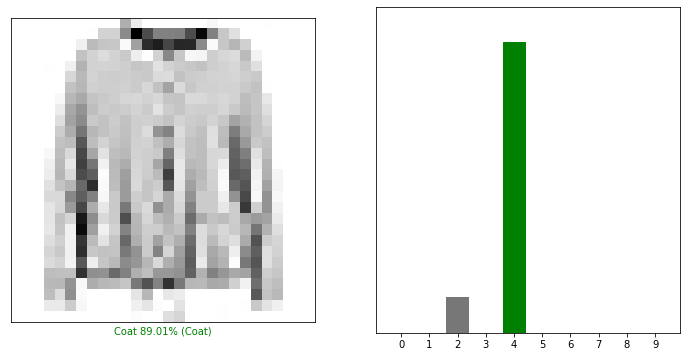

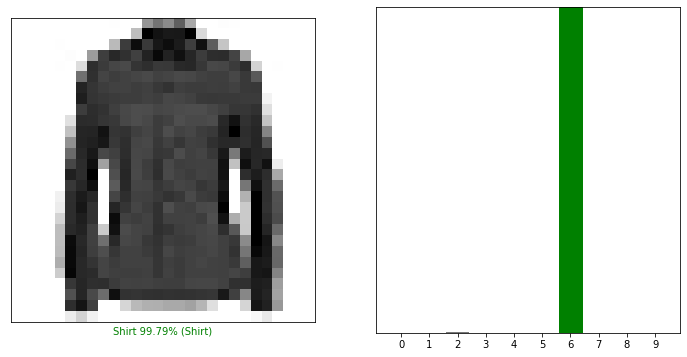

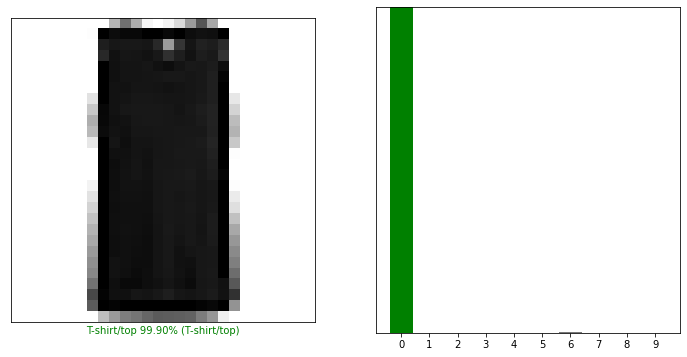

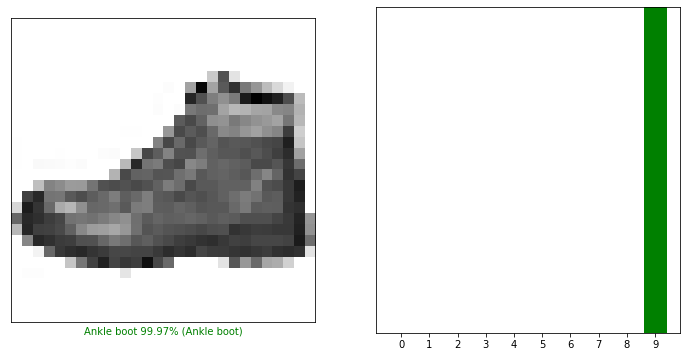

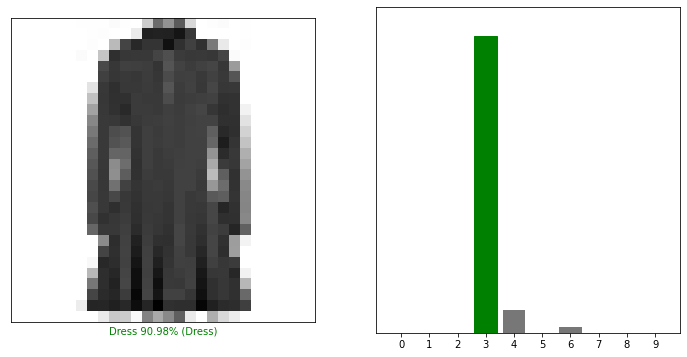

In [25]:
# either way....

for i in range(20, 30):
    plotter(i, predictions, test_labels, test_images)

5
3


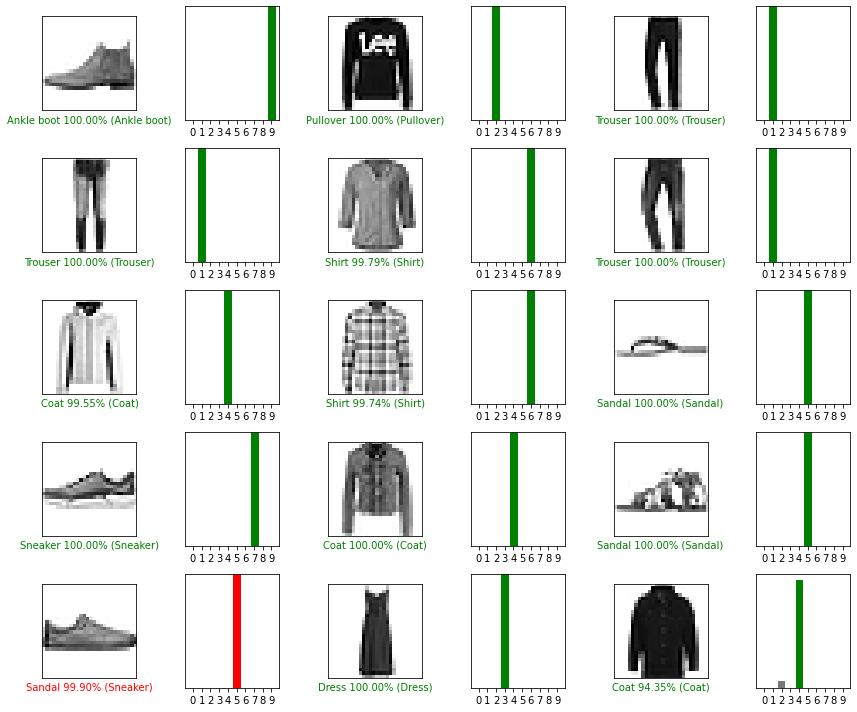

In [27]:
# to produce a mass tight sheet of predictions and their graph

num_rows = int(input())
num_cols = int(input())
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plotImg(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plotGraph(i, predictions[i], test_labels)
plt.tight_layout()